# Lineare Regression

### Datensatz für das Training laden

In [19]:
import pandas as pd

df = pd.read_csv("../daten/datensatz_feature_selection.csv")

In [20]:
df.head()

,Tonnage_dealy_1,Tonnage_dealy_2,Tonnage_dealy_3,Tonnage_dealy_4,Tonnage_dealy_5,Tonnage_dealy_6,Tonnage_dealy_7,Tonnage_dealy_8,TageZuvorNichtGeliefert,Hof_VMN,Hof_VMG,Hof_VMM,month,year,Saison_Frühling,Tonnage
0,12.125484,12.125515,12.125542,12.125553,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,5.59
1,5.590000,12.125515,12.125542,12.125553,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,3.23
2,3.230000,5.590000,12.125542,12.125553,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,5.68
3,5.680000,3.230000,5.590000,12.125553,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,5.48
4,5.480000,5.680000,3.230000,5.590000,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,7.84


In [21]:
df.describe()

,Tonnage_dealy_1,Tonnage_dealy_2,Tonnage_dealy_3,Tonnage_dealy_4,Tonnage_dealy_5,Tonnage_dealy_6,Tonnage_dealy_7,Tonnage_dealy_8,TageZuvorNichtGeliefert,Hof_VMN,Hof_VMG,Hof_VMM,month,year,Saison_Frühling,Tonnage
count,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000
mean,12.125484,12.125515,12.125542,12.125553,12.125577,12.125599,12.125625,12.125649,0.399216,0.233086,0.258394,0.205253,6.619073,2021.049664,0.249224,12.125463
std,5.993349,5.993318,5.993295,5.993291,5.993272,5.993258,5.993236,5.993218,0.792081,0.422797,0.437752,0.403887,3.408010,1.405633,0.432564,5.993363
min,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000,2019.000000,0.000000,0.100000
25%,8.080000,8.080000,8.080000,8.080000,8.080000,8.080000,8.080000,8.080000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,0.000000,8.080000
50%,11.100000,11.100000,11.100000,11.100000,11.100000,11.100000,11.100000,11.100000,0.000000,0.000000,0.000000,0.000000,7.000000,2021.000000,0.000000,11.100000
75%,16.910000,16.910000,16.910000,16.910000,16.910000,16.910000,16.910000,16.910000,0.000000,0.000000,1.000000,0.000000,10.000000,2022.000000,0.000000,16.910000
max,59.580000,59.580000,59.580000,59.580000,59.580000,59.580000,59.580000,59.580000,4.000000,1.000000,1.000000,1.000000,12.000000,2023.000000,1.000000,59.580000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381661 entries, 0 to 381660
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Tonnage_dealy_1          381661 non-null  float64
 1   Tonnage_dealy_2          381661 non-null  float64
 2   Tonnage_dealy_3          381661 non-null  float64
 3   Tonnage_dealy_4          381661 non-null  float64
 4   Tonnage_dealy_5          381661 non-null  float64
 5   Tonnage_dealy_6          381661 non-null  float64
 6   Tonnage_dealy_7          381661 non-null  float64
 7   Tonnage_dealy_8          381661 non-null  float64
 8   TageZuvorNichtGeliefert  381661 non-null  int64  
 9   Hof_VMN                  381661 non-null  float64
 10  Hof_VMG                  381661 non-null  float64
 11  Hof_VMM                  381661 non-null  float64
 12  month                    381661 non-null  int64  
 13  year                     381661 non-null  int64  
 14  Sais

## Daten aufteilen

In [23]:
# Trainingsdaten (2019, 2020, 2021)
train_data = df[df['year'].isin([2019, 2020, 2021])]

# Validierungsdaten (2023)
validation_data = df[df['year'] == 2022]

# Testdaten (2022)
test_data = df[df['year'] == 2023]

In [24]:
# Zielvariable
y_train = train_data["Tonnage"]
y_test = test_data["Tonnage"]
y_val = validation_data["Tonnage"]

# Features
X_train = train_data.drop(columns=['Tonnage', 'year'])
X_test = test_data.drop(columns=['Tonnage', 'year'])
X_val = validation_data.drop(columns=['Tonnage', 'year'])

## Standardisierung

**StandardScaler**

Die Standardisierung transformiert die Daten so, dass sie eine Mittelwert von 0 und eine Standardabweichung von 1 haben. Es wird keine Skalierung auf einen festen Bereich angewendet.

Wann ist es sinnvoll?

Wenn die Daten eine normalverteilte Verteilung haben oder die Verteilung unbekannt ist.
Für Modelle, die auf der Berechnung von Abständen oder Gradienten basieren, wie z. B. lineare Regression, logistische Regression, Support Vector Machines (SVM), k-nearest neighbors (k-NN) und neuronale Netze.



In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Liste der numerischen Features (ohne "month" und "year")
numerical_features = [
    "Tonnage_dealy_1", "Tonnage_dealy_2", "Tonnage_dealy_3", "Tonnage_dealy_4",
    "Tonnage_dealy_5", "Tonnage_dealy_6", "Tonnage_dealy_7", "Tonnage_dealy_8",
    "TageZuvorNichtGeliefert", "Hof_VMN", "Hof_VMG", "Hof_VMM"
]

# Standardisierung der Trainingsdaten
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Standardisierung der Testdaten (mit denselben Parametern wie für die Trainingsdaten)
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Standardisierung der Validierungsdaten (mit denselben Parametern wie für die Trainingsdaten)
X_val[numerical_features] = scaler.transform(X_val[numerical_features])

In [26]:
X_train.head()

,Tonnage_dealy_1,Tonnage_dealy_2,Tonnage_dealy_3,Tonnage_dealy_4,Tonnage_dealy_5,Tonnage_dealy_6,Tonnage_dealy_7,Tonnage_dealy_8,TageZuvorNichtGeliefert,Hof_VMN,Hof_VMG,Hof_VMM,month,Saison_Frühling
0,-0.072657,-0.072661,-0.072664,-0.072669,-0.072674,-0.072678,-0.072681,-0.07268,-0.507076,-0.545146,-0.594382,-0.505853,1,0
1,-1.171377,-0.072661,-0.072664,-0.072669,-0.072674,-0.072678,-0.072681,-0.07268,-0.507076,-0.545146,-0.594382,-0.505853,1,0
2,-1.568131,-1.171395,-0.072664,-0.072669,-0.072674,-0.072678,-0.072681,-0.07268,-0.507076,-0.545146,-0.594382,-0.505853,1,0
3,-1.156247,-1.568152,-1.171409,-0.072669,-0.072674,-0.072678,-0.072681,-0.07268,-0.507076,-0.545146,-0.594382,-0.505853,1,0
4,-1.189870,-1.156264,-1.568169,-1.171423,-0.072674,-0.072678,-0.072681,-0.07268,-0.507076,-0.545146,-0.594382,-0.505853,1,0


In [27]:
print(X_train.isna().sum().sum())

0


In [28]:
X_train.shape

(223715, 14)

## Modell trainieren

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn

In [30]:
# Schritt 1: Lineares Regressionsmodell erstellen
model = LinearRegression()

In [31]:
# Schritt 2: Modell mit den Trainingsdaten trainieren
model.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred_train = model.predict(X_train)

print("\n🔹 Trainingsergebnisse (2019-2021):")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train)}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train)}")
print(f"R²: {r2_score(y_train, y_pred_train)}")


🔹 Trainingsergebnisse (2019-2021):
MAE: 3.2594571320125216
MSE: 18.64746422225104
R²: 0.4729747266122114


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_pred_train)

# RMSE manuell berechnen
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 4.32


## Vorhersage auf den Validierungsdaten

In [34]:
# Vorhersagen auf dem Validierungsdatensatz
y_val_pred = model.predict(X_val)

In [35]:
print("\n🔹 Ergebnisse auf den Validierungsdaten (2022):")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred)}")
print(f"MSE: {mean_squared_error(y_val, y_val_pred)}")
print(f"R²: {r2_score(y_val, y_val_pred)}")


🔹 Ergebnisse auf den Validierungsdaten (2022):
MAE: 3.1246838015703275
MSE: 17.367311792024186
R²: 0.48894361650409557


**root mean squared error**

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_val_pred)

# RMSE manuell berechnen
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 4.17


### Vergleich mit tatsächlichen Werten

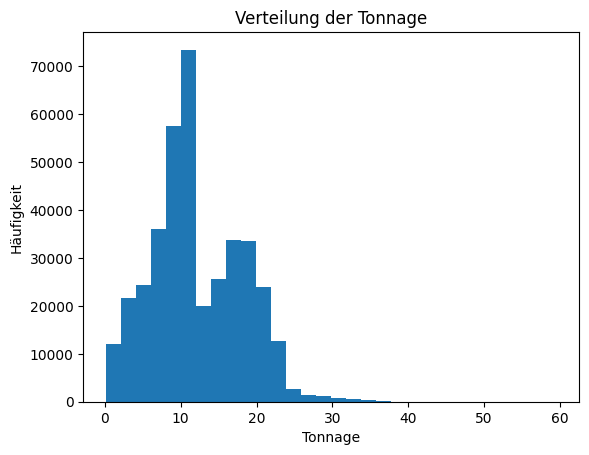

In [37]:
import matplotlib.pyplot as plt

# Histogramm der Tonnage
plt.hist(df['Tonnage'], bins=30)
plt.title("Verteilung der Tonnage")
plt.xlabel("Tonnage")
plt.ylabel("Häufigkeit")
plt.show()

### Schiefe der Tonnage

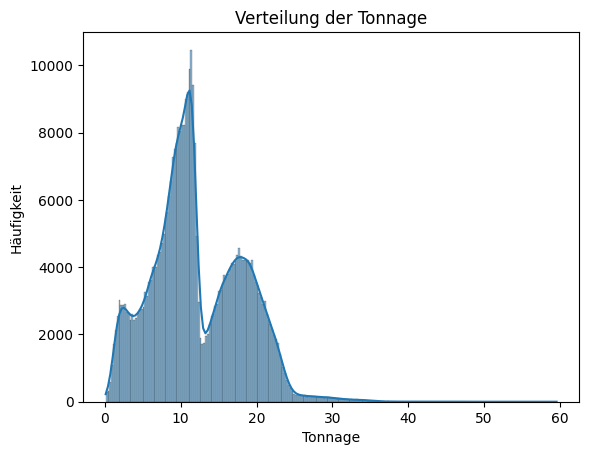

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisierung der Tonnage-Verteilung
sns.histplot(df['Tonnage'], kde=True)
plt.title('Verteilung der Tonnage')
plt.xlabel('Tonnage')
plt.ylabel('Häufigkeit')
plt.show()


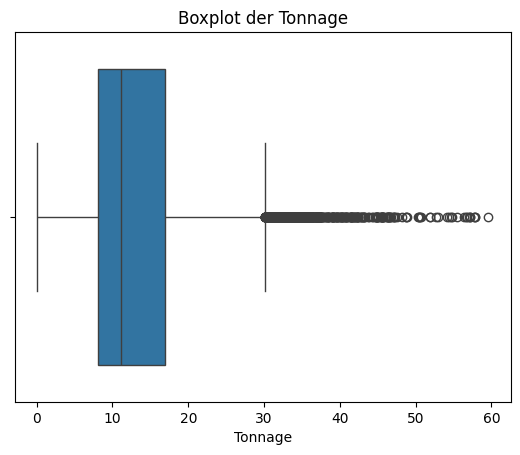

In [39]:
# Visualisierung mit einem Boxplot
sns.boxplot(x=df['Tonnage'])
plt.title('Boxplot der Tonnage')
plt.show()


In [58]:
# Berechnung der Schiefe
from scipy.stats import skew

skewness = skew(df['Tonnage'])
print(f'Schiefe der Tonnage: {skewness}')


Schiefe der Tonnage: 0.4227041636784108


Der **Schiefe-Wert von 0.42** für die Tonnage zeigt eine leichte positive Schiefe (Rechtsschiefe) an. Das bedeutet, dass die Verteilung der Tonnage-Werte eine leichte Verzerrung nach rechts aufweist, was bedeutet, dass es eine größere Anzahl von kleineren Tonnage-Werten gibt und nur einige wenige höhere Werte.

## Log-Transformation 

Die Log-Transformation ist eine Methode, um die Verteilung von Daten zu verändern, insbesondere wenn die Daten schief oder sehr spitz sind. Sie wird oft verwendet, um:

- Skalierung von großen Werten zu kleineren, besser handhabbaren Werten.
    Reduzierung der Schiefe der Verteilung, insbesondere bei positiven, rechtsschiefen (exponentiellen) Verteilungen.
    Linearität herzustellen, wenn das Verhältnis zwischen den Variablen nicht linear ist.

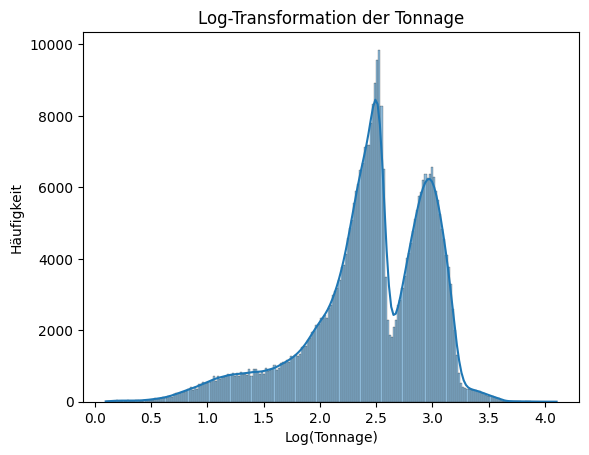

In [41]:
import numpy as np

# Log-Transformation der Tonnage
df['Log_Tonnage'] = np.log(df['Tonnage'] + 1)  # +1, um log(0) zu vermeiden

# Visualisiere die veränderte Verteilung
sns.histplot(df['Log_Tonnage'], kde=True)
plt.title('Log-Transformation der Tonnage')
plt.xlabel('Log(Tonnage)')
plt.ylabel('Häufigkeit')
plt.show()


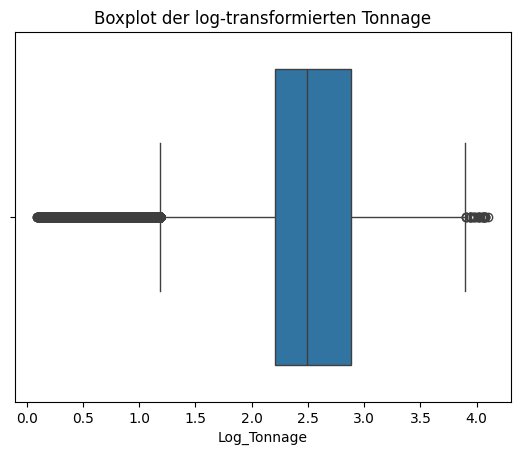

In [42]:
# Visualisiere die log-transformierte Tonnage mit einem Boxplot
sns.boxplot(x=df['Log_Tonnage'])
plt.title('Boxplot der log-transformierten Tonnage')
plt.show()


In [43]:
# Durchschnittliche Tonnage berechnen
durchschnitt_tonnage = df['Tonnage'].mean()

print(f"Durchschnittliche Tonnage: {durchschnitt_tonnage:.2f} Tonnen")


Durchschnittliche Tonnage: 12.13 Tonnen


### Modell mit log-transformierten Daten trainieren

In [44]:
# Aufteilen der Daten in Trainings-, Validierungs- und Testdaten
train_data = df[df['year'].isin([2029, 2020, 2021])]
validation_data = df[df['year'] == 2022]
test_data = df[df['year'] == 2023]

In [45]:
# Features und Zielvariable (mit log-transformierter Tonnage)
X_train = train_data.drop(['Tonnage', 'Log_Tonnage'], axis=1)
y_train = train_data['Log_Tonnage']

X_validation = validation_data.drop(['Tonnage', 'Log_Tonnage'], axis=1)
y_validation = validation_data['Log_Tonnage']

X_test = test_data.drop(['Tonnage', 'Log_Tonnage'], axis=1)
y_test = test_data['Log_Tonnage']


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

# Initialisiere das Modell
model = LinearRegression()

# Trainiere das Modell mit den log-transformierten Daten
model.fit(X_train, y_train)

# Vorhersagen auf den Validierungsdaten
y_pred = model.predict(X_validation)

# Metriken zur Evaluierung
mae = mean_absolute_error(y_validation, y_pred)
mse = mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 0.2901
MSE: 0.1594
R²: 0.4867
RMSE: 0.3992


## Rücktransformation

In [47]:
# Rücktransformation der Vorhersagen
predicted_tonnage = np.exp(y_pred) - 1

In [48]:
# Rücktransformation der Vorhersagen
predicted_tonnage = np.exp(y_pred) - 1

# Berechne Metriken mit den Rücktransformierten Werten
mae_tonnage = mean_absolute_error(np.exp(y_validation) - 1, predicted_tonnage)
mse_tonnage = mean_squared_error(np.exp(y_validation) - 1, predicted_tonnage)
rmse_tonnage = np.sqrt(mse_tonnage)
r2_tonnage = r2_score(np.exp(y_validation) - 1, predicted_tonnage)

print(f"MAE (Tonnage): {mae_tonnage:.4f}")
print(f"MSE (Tonnage): {mse_tonnage:.4f}")
print(f"RMSE (Tonnage): {rmse_tonnage:.4f}")
print(f"R² (Tonnage): {r2_tonnage:.4f}")


MAE (Tonnage): 3.1887
MSE (Tonnage): 19.5319
RMSE (Tonnage): 4.4195
R² (Tonnage): 0.4252


- **MAE** (Mean Absolute Error): **3.0581** – Das ist der durchschnittliche absolute Fehler zwischen den tatsächlichen und den vorhergesagten Tonnage-Werten. Ein niedrigerer Wert bedeutet eine bessere Vorhersagegenauigkeit.
- MSE (Mean Squared Error): 16.9052 – Das ist der durchschnittliche quadratische Fehler. Ein niedrigerer Wert deutet ebenfalls auf eine bessere Vorhersage hin.
- RMSE (Root Mean Squared Error): 4.1116 – Das ist die Quadratwurzel des MSE und gibt ebenfalls an, wie stark die Vorhersagen im Durchschnitt von den tatsächlichen Werten abweichen.
- **R² (R-squared)**: 0.5025 – Dieser Wert gibt an, wie gut das Modell die Varianz der tatsächlichen Tonnage-Werte erklärt. Ein Wert von 0.5025 bedeutet, dass das Modell **etwa 50%** der Varianz der Tonnage erklären kann, was ein mäßig gutes Modell ist.

## Vorhersagen auf den Testdaten

Die Rücktransformation ist erforderlich, weil ich in dem Modell mit einer log-transformierten Version der Zielvariable (Tonnage) trainiert habe. Während des Trainings hast du die Zielvariable (Tonnage) mit einer Logarithmus-Transformation bearbeitet, um den Modellen zu helfen, die Verteilung der Zielwerte zu stabilisieren und möglicherweise die Linearität zu verbessern.

In [49]:
# Vorhersagen auf den Testdaten
y_pred_test = model.predict(X_test)

# Rücktransformation der Vorhersagen
predicted_tonnage_test = np.exp(y_pred_test) - 1

# Berechne Metriken mit den Rücktransformierten Werten auf den Testdaten
mae_test = mean_absolute_error(np.exp(y_test) - 1, predicted_tonnage_test)
mse_test = mean_squared_error(np.exp(y_test) - 1, predicted_tonnage_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(np.exp(y_test) - 1, predicted_tonnage_test)

# Ausgabe der Metriken für die Testdaten
print(f"MAE (Testdaten, Tonnage): {mae_test:.4f}")
print(f"MSE (Testdaten, Tonnage): {mse_test:.4f}")
print(f"RMSE (Testdaten, Tonnage): {rmse_test:.4f}")
print(f"R² (Testdaten, Tonnage): {r2_test:.4f}")


MAE (Testdaten, Tonnage): 3.3959
MSE (Testdaten, Tonnage): 24.4158
RMSE (Testdaten, Tonnage): 4.9412
R² (Testdaten, Tonnage): 0.3594


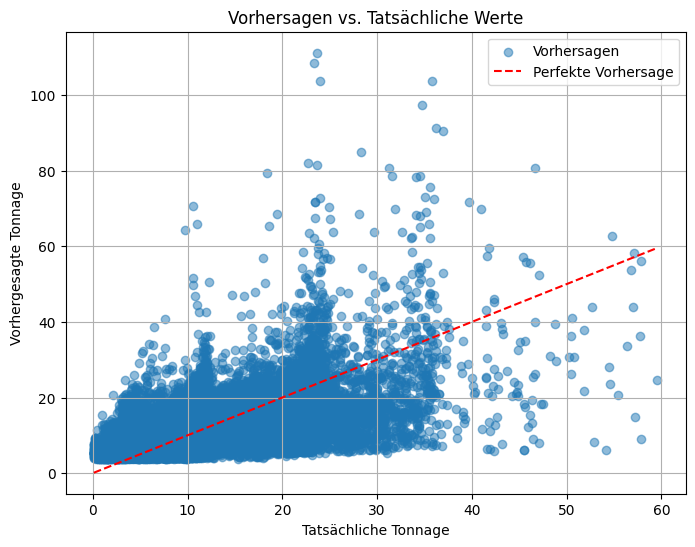

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Tatsächliche Werte (Rücktransformation)
actual_tonnage_test = np.exp(y_test) - 1

plt.figure(figsize=(8, 6))
plt.scatter(actual_tonnage_test, predicted_tonnage_test, alpha=0.5, label="Vorhersagen")
plt.plot([min(actual_tonnage_test), max(actual_tonnage_test)], 
         [min(actual_tonnage_test), max(actual_tonnage_test)], 
         color='red', linestyle='--', label="Perfekte Vorhersage")

plt.xlabel("Tatsächliche Tonnage")
plt.ylabel("Vorhergesagte Tonnage")
plt.title("Vorhersagen vs. Tatsächliche Werte")
plt.legend()
plt.grid()
plt.show()


## Mögliches weiteres Vorgehen: Ridge und Lasso Regression

Ridge oder Lasso Regression: dann handelt es sich dabei auch um lineare Modelle, aber mit einer zusätzlichen Regularisierung (Strafterm), die dabei hilft, Überanpassung (Overfitting) zu verhindern:

- Ridge Regression fügt einen Strafterm auf die Quadrate der Koeffizienten hinzu.

- Lasso Regression fügt einen Strafterm auf die Beträge der Koeffizienten hinzu, was dazu führen kann, dass einige Koeffizienten auf 0 gesetzt werden (Feature Selection).

Koeffizienten sind die Werte, die die Beziehung zwischen den unabhängigen Variablen (Features) und der Zielvariablen in einem Regressionsmodell beschreiben. Sie geben an, wie stark eine bestimmte unabhängige Variable (Feature) die Zielvariable beeinflusst.


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Definiere das Modell
ridge = Ridge()

# Definiere den Parameter-Raum
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search mit Cross-Validation
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train, y_train)

# Bestes Modell ausgeben
print(f"🔹 Bestes Alpha für Ridge: {grid_search_ridge.best_params_['alpha']}")
print(f"🔹 Bestes Modell: {grid_search_ridge.best_estimator_}")


🔹 Bestes Alpha für Ridge: 100
🔹 Bestes Modell: Ridge(alpha=100)


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Definiere das Modell
lasso = Lasso()

# Definiere den Parameter-Raum
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search mit Cross-Validation
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_train, y_train)

# Bestes Modell ausgeben
print(f"🔹 Bestes Alpha für Lasso: {grid_search_lasso.best_params_['alpha']}")
print(f"🔹 Bestes Modell: {grid_search_lasso.best_estimator_}")

🔹 Bestes Alpha für Lasso: 0.01
🔹 Bestes Modell: Lasso(alpha=0.01)
